<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Лабораторная 2.1

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как на семинаре
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [1]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

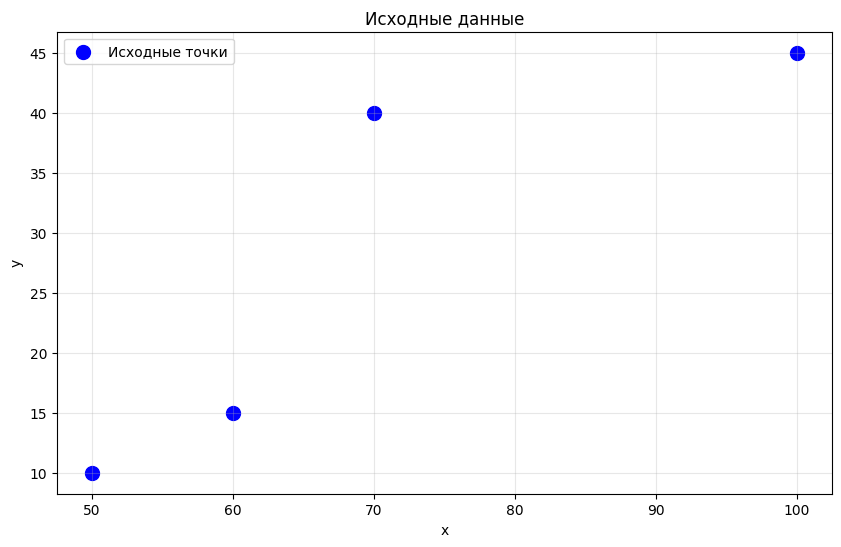

Коэффициенты: w0 = -22.5000, w1 = 0.7143


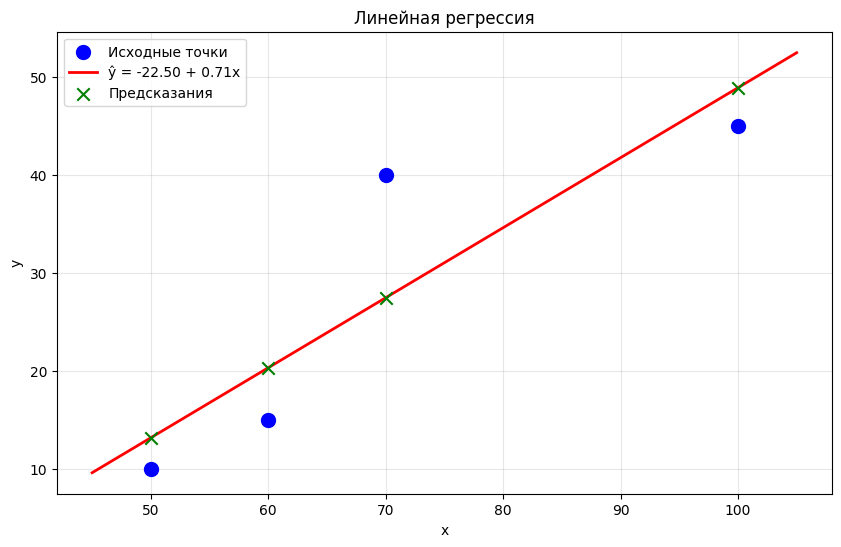

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

# 1. Визуализация исходных данных
plt.figure(figsize=(10, 6))
plt.scatter(x_hw, y_hw, color='blue', s=100, label='Исходные точки')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Исходные данные')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 2. Расчет коэффициентов
x = np.array(x_hw)
y = np.array(y_hw)

x_mean = np.mean(x)
y_mean = np.mean(y)
xy_mean = np.mean(x * y)
x2_mean = np.mean(x**2)

w1 = (xy_mean - x_mean * y_mean) / (x2_mean - x_mean**2)
w0 = y_mean - w1 * x_mean

print(f"Коэффициенты: w0 = {w0:.4f}, w1 = {w1:.4f}")

# 3. Предсказания и визуализация
y_pred = w0 + w1 * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', s=100, label='Исходные точки', zorder=5)

x_line = np.linspace(min(x)-5, max(x)+5, 100)
y_line = w0 + w1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'ŷ = {w0:.2f} + {w1:.2f}x')

plt.scatter(x, y_pred, color='green', s=80, marker='x', label='Предсказания', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()